### Illegal Dump Sites

Most enviromentally firendly neighborhood.

In [100]:
# imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [22]:
# show the first ten rows
dumps = pd.read_csv('Datasets\illegaldumpsites.csv')
dumps.head(10)

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN
5,222 Walter Street,Completed,Pittsburgh,Allentown,5,dump is in deteriorated garage,40.42022451,-79.99477699,NaN
6,Grimes and Elsinburg,Completed,Pittsburgh,Allentown,0.3,"residential street, across the street from a s...",40.41544068,-79.99297857,NaN
7,Parkwood Road Site 1,Surveyed,Pittsburgh,Arlington,3,NaN,40.41068203,-79.96578013,NaN
8,Parkwood Road Site 2,Surveyed,Pittsburgh,Arlington,4,NaN,40.41144932,-79.96714085,NaN
9,Parkwood Road Site 3,Completed,Pittsburgh,Arlington,2.5,NaN,40.41397095,-79.97727203,NaN


In [24]:
# pick out the city of Pittsburgh
dump_in_pitts = dumps.loc[dumps['City'] == 'Pittsburgh']
dump_in_pitts2 = dump_in_pitts.loc[dumps['Status'] != 'Completed']
dump_in_pitts2.head(10)

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
7,Parkwood Road Site 1,Surveyed,Pittsburgh,Arlington,3,NaN,40.41068203,-79.96578013,NaN
8,Parkwood Road Site 2,Surveyed,Pittsburgh,Arlington,4,NaN,40.41144932,-79.96714085,NaN
11,Jonquil Street,Surveyed,Pittsburgh,Arlington,0.5,NaN,40.41609955,-79.9805603,NaN
12,Bassler Street,Surveyed,Pittsburgh,Arlington,0.5,NaN,40.41400146,-79.96459198,NaN
13,Azul Street,Surveyed,Pittsburgh,Arlington,1.5,NaN,40.41648095,-79.96574277,NaN
14,Rothman Street,Surveyed,Pittsburgh,Arlington,2,NaN,40.41384125,-79.97312164,NaN


In [97]:
clean_dump_in_pitts = dump_in_pitts2.drop(['site_name', 'City', 'location_description','latitude', 'longitude', 'estimated_tons','Unnamed: 8'], axis=1)
dump_in_neighborhoods = clean_dump_in_pitts.groupby('Neighborhood').count()
dump_in_neighborhoods

,Status
Neighborhood,
Allentown,4
Arlington,7
Banksville,1
Beechview,6
Beltzhoover,10
Bloomfield,2
Bluff,1
Borough of Millvale,1
Brighton Heights,2


In [98]:
dump_in_neighborhoods.describe()

,Status
count,48.000000
mean,4.520833
std,4.443449
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,20.000000


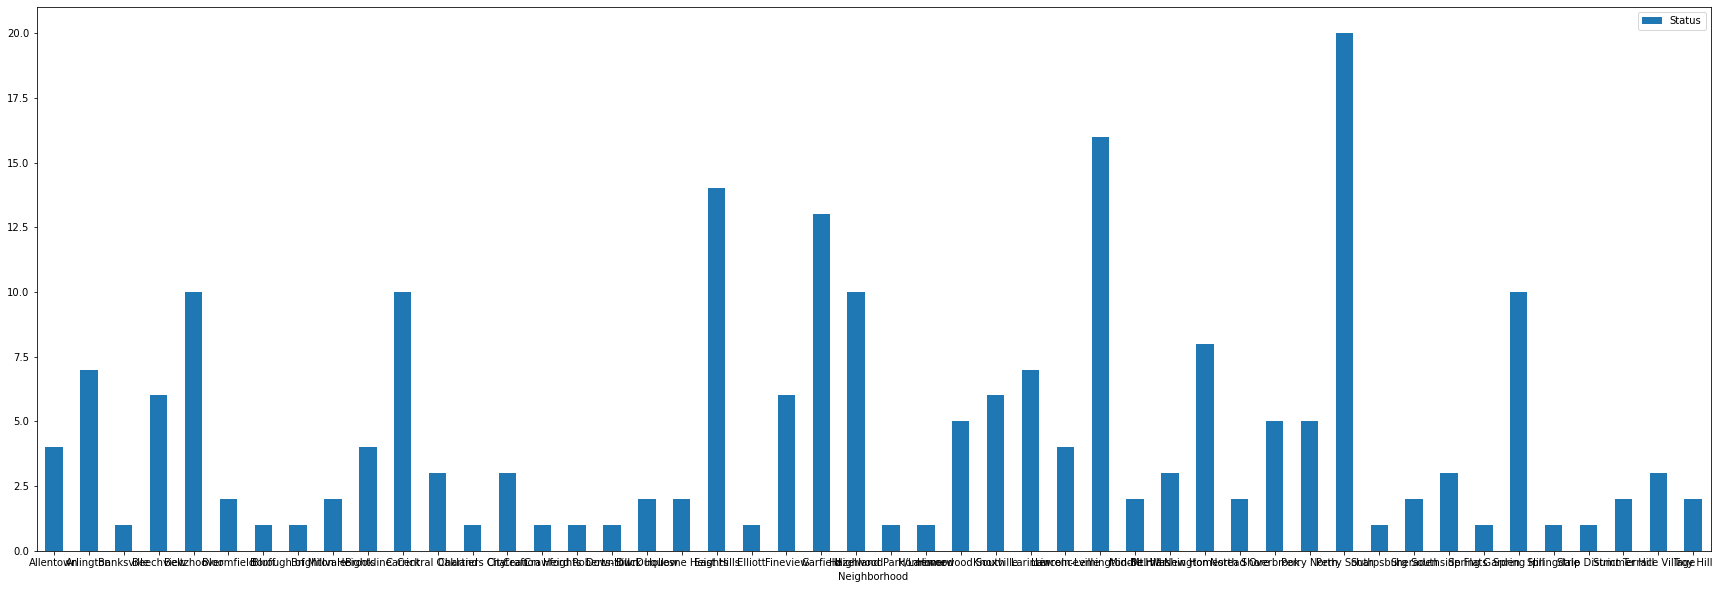

In [108]:
graph = dump_in_neighborhoods.plot.bar(y='Status', rot=0, figsize=[30,10])

<AxesSubplot:>

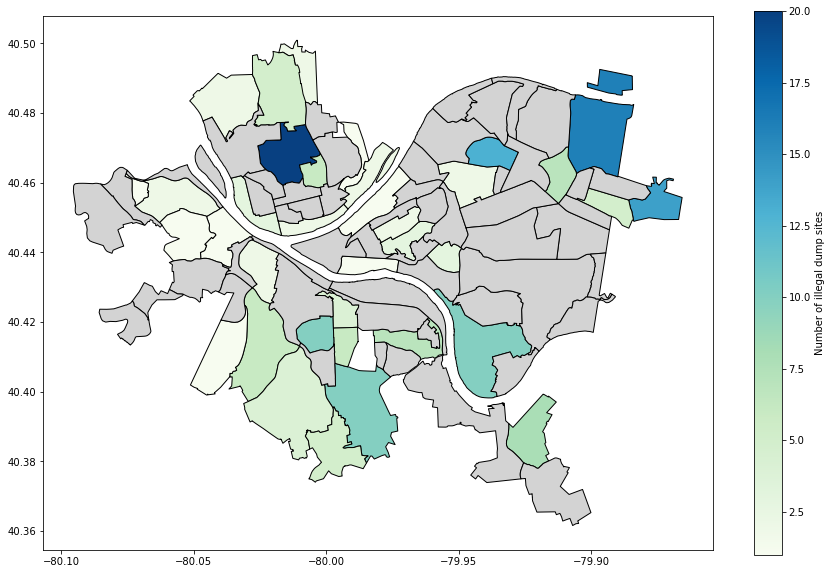

In [120]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
bin_map = neighborhoods.merge(dump_in_neighborhoods, how='left', left_on='hood', right_on='Neighborhood')
bin_map.plot(column='Status',
             cmap='GnBu',
             edgecolor="black",
             legend=True,
             legend_kwds={'label':"Number of illegal dump sites"},
             figsize=(15,10),
             missing_kwds={"color": "lightgrey"}
            )